In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.12.0


In [3]:
import numpy as np
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


Using TensorFlow backend.


In [5]:
train = pd.read_csv("letter-recognition-train.csv").values
#train = pd.read_csv("letter-recognition-test.csv").values
print(train);

[[20  2  8 ...  8  0  8]
 [ 9  5 12 ...  8  4 10]
 [ 4  4 11 ...  7  3  9]
 ...
 [18  4  6 ...  7  7  7]
 [ 7  8 14 ...  7  5  8]
 [ 5  4  7 ...  8  5  8]]


In [6]:
trainX = train[:, 1:].reshape(train.shape[0],1,4, 4).astype( 'float32' )
#trainX = trainX / 128
#trainX = trainX*10
#trainX=tf.keras.utils.normalize(trainX,axis=2)

print(trainX)


y_train = train[:,0].astype( 'float32' )

print(y_train)

[[[[ 2.  8.  3.  5.]
   [ 1.  8. 13.  0.]
   [ 6.  6. 10.  8.]
   [ 0.  8.  0.  8.]]]


 [[[ 5. 12.  3.  7.]
   [ 2. 10.  5.  5.]
   [ 4. 13.  3.  9.]
   [ 2.  8.  4. 10.]]]


 [[[ 4. 11.  6.  8.]
   [ 6. 10.  6.  2.]
   [ 6. 10.  3.  7.]
   [ 3.  7.  3.  9.]]]


 ...


 [[[ 4.  6.  6.  4.]
   [ 6.  8.  6.  7.]
   [ 3.  7.  5.  7.]
   [ 4.  7.  7.  7.]]]


 [[[ 8. 14.  7.  8.]
   [ 4.  8.  4.  5.]
   [ 3.  8.  4.  5.]
   [ 4.  7.  5.  8.]]]


 [[[ 4.  7.  5.  5.]
   [ 3.  7.  7.  2.]
   [ 9. 11.  6.  9.]
   [ 2.  8.  5.  8.]]]]
[20.  9.  4. ... 18.  7.  5.]


In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train=y_train.astype('float32')
print(y_train)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


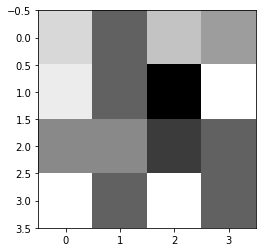

[[ 2.  8.  3.  5.]
 [ 1.  8. 13.  0.]
 [ 6.  6. 10.  8.]
 [ 0.  8.  0.  8.]]


In [12]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0][0], cmap=plt.cm.binary)
plt.show()
print(trainX[0][0])

In [27]:
from keras import optimizers
model = Sequential()
#K.set_image_dim_ordering('th')
model.add(Flatten())
model.add(Dense(21,activation='sigmoid'))
model.add(Dense(150,activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(85,activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(21,activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(26, activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros'))
adam = optimizers.Adam(lr = 0.001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[ 'accuracy' ])

Epoch 1/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0545 - acc: 0.0394
Epoch 2/2500
15999/15999 [==============================] - 1s 33us/step - loss: 0.0371 - acc: 0.0389
Epoch 3/2500
15999/15999 [==============================] - 1s 33us/step - loss: 0.0370 - acc: 0.0386
Epoch 4/2500
15999/15999 [==============================] - 1s 36us/step - loss: 0.0370 - acc: 0.0376
Epoch 5/2500
15999/15999 [==============================] - 1s 36us/step - loss: 0.0370 - acc: 0.0358
Epoch 6/2500
15999/15999 [==============================] - 0s 31us/step - loss: 0.0370 - acc: 0.0396
Epoch 7/2500
15999/15999 [==============================] - 0s 31us/step - loss: 0.0370 - acc: 0.0392
Epoch 8/2500
15999/15999 [==============================] - 1s 33us/step - loss: 0.0370 - acc: 0.0392
Epoch 9/2500
15999/15999 [==============================] - 1s 32us/step - loss: 0.0370 - acc: 0.0374: 0s - loss: 0.0370 - ac
Epoch 10/2500
15999/15999 [==============================]

15999/15999 [==============================] - 1s 39us/step - loss: 0.0243 - acc: 0.4917
Epoch 81/2500
15999/15999 [==============================] - 1s 37us/step - loss: 0.0240 - acc: 0.5058
Epoch 82/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0237 - acc: 0.5193
Epoch 83/2500
15999/15999 [==============================] - 1s 37us/step - loss: 0.0234 - acc: 0.5303
Epoch 84/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0232 - acc: 0.5315
Epoch 85/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0229 - acc: 0.5469
Epoch 86/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0227 - acc: 0.5597
Epoch 87/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0223 - acc: 0.5710
Epoch 88/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0221 - acc: 0.5745
Epoch 89/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.021

15999/15999 [==============================] - 1s 39us/step - loss: 0.0124 - acc: 0.7747
Epoch 160/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0123 - acc: 0.7752
Epoch 161/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0122 - acc: 0.7762
Epoch 162/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0120 - acc: 0.7804
Epoch 163/2500
15999/15999 [==============================] - 1s 37us/step - loss: 0.0120 - acc: 0.7795
Epoch 164/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0119 - acc: 0.7822
Epoch 165/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0118 - acc: 0.7838
Epoch 166/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0117 - acc: 0.7830
Epoch 167/2500
15999/15999 [==============================] - 1s 38us/step - loss: 0.0116 - acc: 0.7874
Epoch 168/2500
15999/15999 [==============================] - 1s 39us/step - lo

15999/15999 [==============================] - 1s 41us/step - loss: 0.0081 - acc: 0.8467
Epoch 238/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0081 - acc: 0.8480
Epoch 239/2500
15999/15999 [==============================] - 1s 57us/step - loss: 0.0080 - acc: 0.8484
Epoch 240/2500
15999/15999 [==============================] - 1s 57us/step - loss: 0.0080 - acc: 0.8495
Epoch 241/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0080 - acc: 0.8483
Epoch 242/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0079 - acc: 0.8490
Epoch 243/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0079 - acc: 0.8502
Epoch 244/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0079 - acc: 0.8499
Epoch 245/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0078 - acc: 0.8517
Epoch 246/2500
15999/15999 [==============================] - 1s 40us/step - lo

15999/15999 [==============================] - 1s 39us/step - loss: 0.0062 - acc: 0.8789
Epoch 316/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0064 - acc: 0.8766
Epoch 317/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0063 - acc: 0.8797
Epoch 318/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0063 - acc: 0.8788
Epoch 319/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0063 - acc: 0.8796
Epoch 320/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0062 - acc: 0.8789
Epoch 321/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0062 - acc: 0.8817
Epoch 322/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0062 - acc: 0.8804
Epoch 323/2500
15999/15999 [==============================] - 1s 39us/step - loss: 0.0062 - acc: 0.8814
Epoch 324/2500
15999/15999 [==============================] - 1s 40us/step - lo

15999/15999 [==============================] - 1s 40us/step - loss: 0.0052 - acc: 0.8981
Epoch 394/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0052 - acc: 0.8989
Epoch 395/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0051 - acc: 0.9001
Epoch 396/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0051 - acc: 0.8984
Epoch 397/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0050 - acc: 0.9020
Epoch 398/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0051 - acc: 0.9013
Epoch 399/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0051 - acc: 0.9029
Epoch 400/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0050 - acc: 0.9022
Epoch 401/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0051 - acc: 0.9022
Epoch 402/2500
15999/15999 [==============================] - 1s 45us/step - lo

15999/15999 [==============================] - 1s 47us/step - loss: 0.0043 - acc: 0.9152
Epoch 472/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0043 - acc: 0.9150
Epoch 473/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0043 - acc: 0.9148
Epoch 474/2500
15999/15999 [==============================] - 1s 54us/step - loss: 0.0043 - acc: 0.9146
Epoch 475/2500
15999/15999 [==============================] - 1s 54us/step - loss: 0.0043 - acc: 0.9148
Epoch 476/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0042 - acc: 0.9174
Epoch 477/2500
15999/15999 [==============================] - 1s 57us/step - loss: 0.0042 - acc: 0.9159
Epoch 478/2500
15999/15999 [==============================] - 1s 65us/step - loss: 0.0042 - acc: 0.9169
Epoch 479/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0043 - acc: 0.9167
Epoch 480/2500
15999/15999 [==============================] - 1s 70us/step - lo

15999/15999 [==============================] - 1s 56us/step - loss: 0.0036 - acc: 0.9270
Epoch 550/2500
15999/15999 [==============================] - 1s 55us/step - loss: 0.0036 - acc: 0.9278
Epoch 551/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0036 - acc: 0.9272
Epoch 552/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0036 - acc: 0.9279
Epoch 553/2500
15999/15999 [==============================] - 1s 57us/step - loss: 0.0035 - acc: 0.9291
Epoch 554/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0036 - acc: 0.9279
Epoch 555/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0036 - acc: 0.9286
Epoch 556/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0035 - acc: 0.9282
Epoch 557/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0035 - acc: 0.9287
Epoch 558/2500
15999/15999 [==============================] - 1s 58us/step - lo

15999/15999 [==============================] - 1s 40us/step - loss: 0.0031 - acc: 0.9358
Epoch 628/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0031 - acc: 0.9367
Epoch 629/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0031 - acc: 0.9360
Epoch 630/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0031 - acc: 0.9370
Epoch 631/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0032 - acc: 0.9351
Epoch 632/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0032 - acc: 0.9354
Epoch 633/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0031 - acc: 0.9361
Epoch 634/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0031 - acc: 0.9359
Epoch 635/2500
15999/15999 [==============================] - 1s 62us/step - loss: 0.0031 - acc: 0.9379
Epoch 636/2500
15999/15999 [==============================] - 1s 51us/step - lo

15999/15999 [==============================] - 1s 46us/step - loss: 0.0028 - acc: 0.9408
Epoch 706/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0028 - acc: 0.9407
Epoch 707/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0029 - acc: 0.9398: 0s - loss: 0.0028 - a
Epoch 708/2500
15999/15999 [==============================] - 1s 91us/step - loss: 0.0028 - acc: 0.9406
Epoch 709/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0028 - acc: 0.9407
Epoch 710/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0028 - acc: 0.9402
Epoch 711/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0028 - acc: 0.9404
Epoch 712/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0028 - acc: 0.9410
Epoch 713/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0028 - acc: 0.9416
Epoch 714/2500
15999/15999 [============================

15999/15999 [==============================] - 1s 43us/step - loss: 0.0026 - acc: 0.9433
Epoch 784/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0027 - acc: 0.9436
Epoch 785/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0026 - acc: 0.9442
Epoch 786/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0026 - acc: 0.9445
Epoch 787/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0027 - acc: 0.9442
Epoch 788/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0026 - acc: 0.9446
Epoch 789/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0026 - acc: 0.9443
Epoch 790/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0027 - acc: 0.9431
Epoch 791/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0026 - acc: 0.9447
Epoch 792/2500
15999/15999 [==============================] - 1s 42us/step - lo

15999/15999 [==============================] - 1s 48us/step - loss: 0.0024 - acc: 0.9474
Epoch 862/2500
15999/15999 [==============================] - 1s 55us/step - loss: 0.0024 - acc: 0.9478
Epoch 863/2500
15999/15999 [==============================] - 1s 54us/step - loss: 0.0025 - acc: 0.9472
Epoch 864/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0024 - acc: 0.9476
Epoch 865/2500
15999/15999 [==============================] - 1s 72us/step - loss: 0.0025 - acc: 0.9471
Epoch 866/2500
15999/15999 [==============================] - 1s 69us/step - loss: 0.0024 - acc: 0.9482: 0s - loss: 0.0024 - acc:
Epoch 867/2500
15999/15999 [==============================] - 1s 73us/step - loss: 0.0024 - acc: 0.9482
Epoch 868/2500
15999/15999 [==============================] - 1s 83us/step - loss: 0.0025 - acc: 0.9466
Epoch 869/2500
15999/15999 [==============================] - 1s 64us/step - loss: 0.0025 - acc: 0.9466
Epoch 870/2500
15999/15999 [=========================

15999/15999 [==============================] - 1s 41us/step - loss: 0.0023 - acc: 0.9494
Epoch 940/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0023 - acc: 0.9488
Epoch 941/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0023 - acc: 0.9499
Epoch 942/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0023 - acc: 0.9497
Epoch 943/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0022 - acc: 0.9514
Epoch 944/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0023 - acc: 0.9503
Epoch 945/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0022 - acc: 0.9510
Epoch 946/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0023 - acc: 0.9496
Epoch 947/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0023 - acc: 0.9504
Epoch 948/2500
15999/15999 [==============================] - 1s 42us/step - lo

15999/15999 [==============================] - 1s 63us/step - loss: 0.0022 - acc: 0.9521
Epoch 1018/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0022 - acc: 0.9517
Epoch 1019/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0021 - acc: 0.9522
Epoch 1020/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0022 - acc: 0.9511
Epoch 1021/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0022 - acc: 0.9516
Epoch 1022/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0022 - acc: 0.9519
Epoch 1023/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0022 - acc: 0.9508
Epoch 1024/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0021 - acc: 0.9526
Epoch 1025/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0022 - acc: 0.9516
Epoch 1026/2500
15999/15999 [==============================] - 1s 45us/

15999/15999 [==============================] - 1s 45us/step - loss: 0.0021 - acc: 0.9526
Epoch 1095/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0021 - acc: 0.9530
Epoch 1096/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0021 - acc: 0.9529
Epoch 1097/2500
15999/15999 [==============================] - 1s 64us/step - loss: 0.0021 - acc: 0.9534
Epoch 1098/2500
15999/15999 [==============================] - 1s 70us/step - loss: 0.0022 - acc: 0.9511
Epoch 1099/2500
15999/15999 [==============================] - 1s 68us/step - loss: 0.0020 - acc: 0.9537
Epoch 1100/2500
15999/15999 [==============================] - 1s 92us/step - loss: 0.0020 - acc: 0.9543
Epoch 1101/2500
15999/15999 [==============================] - 1s 73us/step - loss: 0.0022 - acc: 0.9516
Epoch 1102/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0021 - acc: 0.9530
Epoch 1103/2500
15999/15999 [==============================] - 1s 47us/

15999/15999 [==============================] - 1s 42us/step - loss: 0.0020 - acc: 0.9540
Epoch 1172/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0020 - acc: 0.9537
Epoch 1173/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0020 - acc: 0.9541
Epoch 1174/2500
15999/15999 [==============================] - 1s 68us/step - loss: 0.0021 - acc: 0.9522
Epoch 1175/2500
15999/15999 [==============================] - 1s 59us/step - loss: 0.0020 - acc: 0.9542
Epoch 1176/2500
15999/15999 [==============================] - 1s 74us/step - loss: 0.0019 - acc: 0.9549
Epoch 1177/2500
15999/15999 [==============================] - 1s 59us/step - loss: 0.0020 - acc: 0.9543
Epoch 1178/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0021 - acc: 0.9532
Epoch 1179/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0021 - acc: 0.9536: 0s - loss: 0.0024 
Epoch 1180/2500
15999/15999 [======================

Epoch 1249/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0022 - acc: 0.9524
Epoch 1250/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0020 - acc: 0.9540
Epoch 1251/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0020 - acc: 0.9544
Epoch 1252/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0020 - acc: 0.9543
Epoch 1253/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0019 - acc: 0.9549
Epoch 1254/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0019 - acc: 0.9557
Epoch 1255/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0021 - acc: 0.9539
Epoch 1256/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0022 - acc: 0.9524
Epoch 1257/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0019 - acc: 0.9551
Epoch 1258/2500
15999/15999 [==========================

15999/15999 [==============================] - 1s 51us/step - loss: 0.0018 - acc: 0.9574
Epoch 1327/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0021 - acc: 0.9542
Epoch 1328/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0019 - acc: 0.9567
Epoch 1329/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0019 - acc: 0.9564
Epoch 1330/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0019 - acc: 0.9571
Epoch 1331/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0018 - acc: 0.9574
Epoch 1332/2500
15999/15999 [==============================] - 1s 62us/step - loss: 0.0019 - acc: 0.9564
Epoch 1333/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0020 - acc: 0.9560
Epoch 1334/2500
15999/15999 [==============================] - 1s 51us/step - loss: 0.0019 - acc: 0.9574
Epoch 1335/2500
15999/15999 [==============================] - 1s 65us/

15999/15999 [==============================] - 1s 46us/step - loss: 0.0017 - acc: 0.9602: 0s - loss: 0.0015 - 
Epoch 1404/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0019 - acc: 0.9573
Epoch 1405/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0018 - acc: 0.9584
Epoch 1406/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0019 - acc: 0.9575
Epoch 1407/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0019 - acc: 0.9579
Epoch 1408/2500
15999/15999 [==============================] - 1s 44us/step - loss: 0.0017 - acc: 0.9598
Epoch 1409/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0019 - acc: 0.9567
Epoch 1410/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0018 - acc: 0.9582
Epoch 1411/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0019 - acc: 0.9576
Epoch 1412/2500
15999/15999 [====================

15999/15999 [==============================] - 1s 48us/step - loss: 0.0018 - acc: 0.9589
Epoch 1481/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0017 - acc: 0.9598
Epoch 1482/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0018 - acc: 0.9592
Epoch 1483/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0018 - acc: 0.9589
Epoch 1484/2500
15999/15999 [==============================] - 1s 75us/step - loss: 0.0019 - acc: 0.9572
Epoch 1485/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0018 - acc: 0.9587
Epoch 1486/2500
15999/15999 [==============================] - 1s 55us/step - loss: 0.0017 - acc: 0.9591
Epoch 1487/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0016 - acc: 0.9607
Epoch 1488/2500
15999/15999 [==============================] - 1s 58us/step - loss: 0.0019 - acc: 0.9571
Epoch 1489/2500
15999/15999 [==============================] - 1s 42us/

15999/15999 [==============================] - 1s 62us/step - loss: 0.0019 - acc: 0.9567
Epoch 1558/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0018 - acc: 0.9586
Epoch 1559/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0017 - acc: 0.9599
Epoch 1560/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0017 - acc: 0.9598
Epoch 1561/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0019 - acc: 0.9586
Epoch 1562/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0018 - acc: 0.9589
Epoch 1563/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0017 - acc: 0.9592
Epoch 1564/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0019 - acc: 0.9572
Epoch 1565/2500
15999/15999 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9607
Epoch 1566/2500
15999/15999 [==============================] - 1s 61us/

15999/15999 [==============================] - 1s 68us/step - loss: 0.0017 - acc: 0.9601
Epoch 1635/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0018 - acc: 0.9586
Epoch 1636/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0017 - acc: 0.9596
Epoch 1637/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0018 - acc: 0.9586
Epoch 1638/2500
15999/15999 [==============================] - 1s 51us/step - loss: 0.0018 - acc: 0.9584
Epoch 1639/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0019 - acc: 0.9578
Epoch 1640/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0017 - acc: 0.9594
Epoch 1641/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0016 - acc: 0.9607
Epoch 1642/2500
15999/15999 [==============================] - 1s 77us/step - loss: 0.0019 - acc: 0.9582
Epoch 1643/2500
15999/15999 [==============================] - 1s 43us/

15999/15999 [==============================] - 1s 68us/step - loss: 0.0018 - acc: 0.9589
Epoch 1713/2500
15999/15999 [==============================] - 1s 72us/step - loss: 0.0017 - acc: 0.9601
Epoch 1714/2500
15999/15999 [==============================] - 2s 94us/step - loss: 0.0017 - acc: 0.9602
Epoch 1715/2500
15999/15999 [==============================] - 1s 71us/step - loss: 0.0017 - acc: 0.9611
Epoch 1716/2500
15999/15999 [==============================] - 1s 67us/step - loss: 0.0016 - acc: 0.9608
Epoch 1717/2500
15999/15999 [==============================] - 1s 61us/step - loss: 0.0018 - acc: 0.9589
Epoch 1718/2500
15999/15999 [==============================] - 1s 60us/step - loss: 0.0018 - acc: 0.9592
Epoch 1719/2500
15999/15999 [==============================] - 1s 70us/step - loss: 0.0017 - acc: 0.9608
Epoch 1720/2500
15999/15999 [==============================] - 1s 79us/step - loss: 0.0017 - acc: 0.9604
Epoch 1721/2500
15999/15999 [==============================] - 1s 72us/

15999/15999 [==============================] - 1s 53us/step - loss: 0.0017 - acc: 0.9607
Epoch 1790/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0017 - acc: 0.9614
Epoch 1791/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0017 - acc: 0.9616
Epoch 1792/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0018 - acc: 0.9597
Epoch 1793/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0016 - acc: 0.9617
Epoch 1794/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0016 - acc: 0.9618
Epoch 1795/2500
15999/15999 [==============================] - 1s 54us/step - loss: 0.0019 - acc: 0.9589
Epoch 1796/2500
15999/15999 [==============================] - 1s 73us/step - loss: 0.0017 - acc: 0.9606
Epoch 1797/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0016 - acc: 0.9613
Epoch 1798/2500
15999/15999 [==============================] - 1s 70us/

15999/15999 [==============================] - 1s 44us/step - loss: 0.0017 - acc: 0.9612
Epoch 1868/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0018 - acc: 0.9594
Epoch 1869/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0015 - acc: 0.9631
Epoch 1870/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0017 - acc: 0.9611
Epoch 1871/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0018 - acc: 0.9598
Epoch 1872/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0016 - acc: 0.9622
Epoch 1873/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0016 - acc: 0.9622
Epoch 1874/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0019 - acc: 0.9589
Epoch 1875/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0016 - acc: 0.9614
Epoch 1876/2500
15999/15999 [==============================] - 1s 46us/

15999/15999 [==============================] - 1s 67us/step - loss: 0.0016 - acc: 0.9615
Epoch 1945/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0016 - acc: 0.9622
Epoch 1946/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0018 - acc: 0.9594
Epoch 1947/2500
15999/15999 [==============================] - 1s 57us/step - loss: 0.0016 - acc: 0.9620ETA: 0s - loss: 0.001
Epoch 1948/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0017 - acc: 0.9609
Epoch 1949/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0016 - acc: 0.9616
Epoch 1950/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0016 - acc: 0.9621
Epoch 1951/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0016 - acc: 0.9615
Epoch 1952/2500
15999/15999 [==============================] - 1s 53us/step - loss: 0.0016 - acc: 0.9614
Epoch 1953/2500
15999/15999 [=====================

15999/15999 [==============================] - 1s 41us/step - loss: 0.0015 - acc: 0.9636
Epoch 2022/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9629
Epoch 2023/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0018 - acc: 0.9607
Epoch 2024/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9628
Epoch 2025/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9631
Epoch 2026/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0017 - acc: 0.9615
Epoch 2027/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0017 - acc: 0.9616
Epoch 2028/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9625
Epoch 2029/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0015 - acc: 0.9642
Epoch 2030/2500
15999/15999 [==============================] - 1s 48us/

15999/15999 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9632
Epoch 2100/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0016 - acc: 0.9632: 0s - loss: 0.001
Epoch 2101/2500
15999/15999 [==============================] - 1s 48us/step - loss: 0.0017 - acc: 0.9619
Epoch 2102/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0015 - acc: 0.9637
Epoch 2103/2500
15999/15999 [==============================] - 1s 52us/step - loss: 0.0016 - acc: 0.9625
Epoch 2104/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0015 - acc: 0.9635
Epoch 2105/2500
15999/15999 [==============================] - 1s 56us/step - loss: 0.0016 - acc: 0.9629
Epoch 2106/2500
15999/15999 [==============================] - 1s 45us/step - loss: 0.0015 - acc: 0.9638
Epoch 2107/2500
15999/15999 [==============================] - 1s 78us/step - loss: 0.0015 - acc: 0.9636
Epoch 2108/2500
15999/15999 [========================

15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9637
Epoch 2177/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9632
Epoch 2178/2500
15999/15999 [==============================] - 1s 46us/step - loss: 0.0016 - acc: 0.9626
Epoch 2179/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0015 - acc: 0.9639
Epoch 2180/2500
15999/15999 [==============================] - 1s 50us/step - loss: 0.0016 - acc: 0.9629
Epoch 2181/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9627
Epoch 2182/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9639
Epoch 2183/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9624
Epoch 2184/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0014 - acc: 0.9647
Epoch 2185/2500
15999/15999 [==============================] - 1s 42us/

15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9634
Epoch 2254/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9638
Epoch 2255/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9628
Epoch 2256/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0015 - acc: 0.9635
Epoch 2257/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0018 - acc: 0.9602
Epoch 2258/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0015 - acc: 0.9641
Epoch 2259/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0016 - acc: 0.9622
Epoch 2260/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9642
Epoch 2261/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0017 - acc: 0.9617
Epoch 2262/2500
15999/15999 [==============================] - 1s 43us/

15999/15999 [==============================] - 1s 40us/step - loss: 0.0014 - acc: 0.9654
Epoch 2331/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0019 - acc: 0.9591
Epoch 2332/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9628
Epoch 2333/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9646
Epoch 2334/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9637
Epoch 2335/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9632
Epoch 2336/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0015 - acc: 0.9637
Epoch 2337/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0014 - acc: 0.9652
Epoch 2338/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0016 - acc: 0.9624
Epoch 2339/2500
15999/15999 [==============================] - 1s 42us/

Epoch 2408/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9641
Epoch 2409/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9626
Epoch 2410/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0016 - acc: 0.9629
Epoch 2411/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9641
Epoch 2412/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0017 - acc: 0.9615
Epoch 2413/2500
15999/15999 [==============================] - 1s 43us/step - loss: 0.0015 - acc: 0.9641
Epoch 2414/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0014 - acc: 0.9649
Epoch 2415/2500
15999/15999 [==============================] - 1s 49us/step - loss: 0.0014 - acc: 0.9656
Epoch 2416/2500
15999/15999 [==============================] - 1s 47us/step - loss: 0.0014 - acc: 0.9656
Epoch 2417/2500
15999/15999 [==========================

15999/15999 [==============================] - 1s 48us/step - loss: 0.0015 - acc: 0.9641
Epoch 2486/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9639
Epoch 2487/2500
15999/15999 [==============================] - 1s 42us/step - loss: 0.0015 - acc: 0.9636
Epoch 2488/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0014 - acc: 0.9656
Epoch 2489/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9641
Epoch 2490/2500
15999/15999 [==============================] - 1s 41us/step - loss: 0.0015 - acc: 0.9641
Epoch 2491/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0015 - acc: 0.9641
Epoch 2492/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0014 - acc: 0.9651
Epoch 2493/2500
15999/15999 [==============================] - 1s 40us/step - loss: 0.0016 - acc: 0.9641
Epoch 2494/2500
15999/15999 [==============================] - 1s 41us/

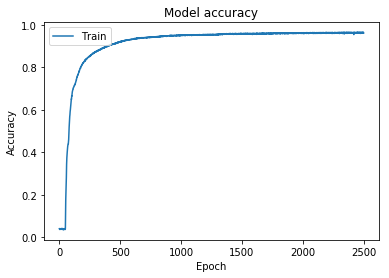

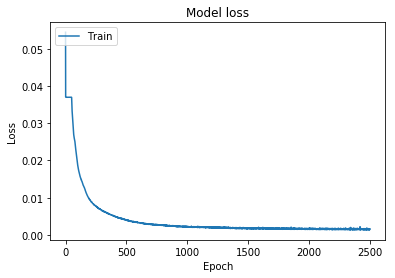

In [28]:

history = model.fit(trainX,y_train, epochs=2500)
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:

indexDoSprawdzenia = 7
test = np.argmax(model.predict(trainX)[indexDoSprawdzenia])
print('indeks litery:')
print(test)
print('litera:')
# asci + wartość
print(str(chr(97+test)))
print(train[indexDoSprawdzenia])

indeks litery:
0
litera:
a
[1 1 1 3 2 1 8 2 2 2 8 2 8 1 6 2 7]


In [17]:
model.evaluate(trainX,y_train,verbose=1)

15999/15999 [==============================] - 0s 17us/step


[0.0021713376356696156, 0.9493093317773568]

In [23]:
model.save_weights("wszystkie.json")